# Newman Girvan

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import operator

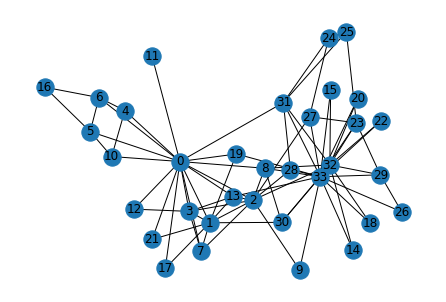

In [2]:
G = nx.karate_club_graph()
nx.draw(G,with_labels=True)

Premièrement attribution des poids sur les sommets, en partant d'un point précis.

In [17]:
def attrib_pds_som(G,sommet_debut):
#retourne le poids des points et la distance pour l'utiliser sur la fonction suivante.
    poids_sommet={}
    dist_sommet={}
    parcouru=[sommet_debut]
    #initialisation de poids des sommets à 0.
    for i in range (0,len(G.nodes())):
        poids_sommet[i]=0
        dist_sommet[i]=0

    #attribution du poids 1 au sommet de base ainsi qu'à ses voisins.
    poids_sommet[sommet_debut]=1
    a_parcourir=[]
    for i in G.neighbors(sommet_debut):
        poids_sommet[i]=1
        dist_sommet[i]=1
        parcouru.append(i)
        a_parcourir.append(i)

    #mise en place d'une boucle afin de parcourir tout les points.
    while len(parcouru)<len(G.nodes()):
        a_parcourir_bis=[]
        for sommet in a_parcourir:
            for i in G.neighbors(sommet):
                if i not in parcouru:
                    poids_sommet[i]=poids_sommet[sommet]
                    dist_sommet[i]=dist_sommet[sommet]+1
                    a_parcourir_bis.append(i)
                    parcouru.append(i)
                else:
                    if dist_sommet[i]==dist_sommet[sommet]+1:
                        poids_sommet[i]=poids_sommet[i]+1
        a_parcourir=[]
        a_parcourir=a_parcourir_bis
        
    return poids_sommet,dist_sommet


#attrib_pds_som(G,0)

Ensuite remontée afin de mettre des poids sur les arètes.

In [27]:
def poids_arete_som(G, sommet_debut):
    poids_arete={}
    poids_sommet,dist_sommet=attrib_pds_som(G,sommet_debut)

    max_dist = max(dist_sommet.items(), key=operator.itemgetter(1))[0]
    for sommet in max_dist:
        for i in G.neighbors(sommet):
            poids_arete[[i,sommet]]=poids_sommet[i]/poids_sommet[sommet]
    
    #for i in range (dist_sommet[max_dist[0]],0,-1):
    return poids_arete
            

({0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 3}, {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3})

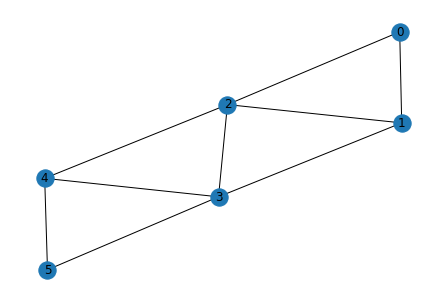

In [25]:
G_test = nx.Graph()

G_test.add_node(0)
G_test.add_node(1)
G_test.add_node(2)
G_test.add_node(3)
G_test.add_node(4)
G_test.add_node(5)

G_test.add_edge(0,1,weight=1)
G_test.add_edge(0,2,weight=1)
G_test.add_edge(1,2,weight=1)
G_test.add_edge(1,3,weight=1)
G_test.add_edge(2,4,weight=1)
G_test.add_edge(2,3,weight=1)
G_test.add_edge(3,4,weight=1)
G_test.add_edge(3,5,weight=1)
G_test.add_edge(4,5,weight=1)

nx.draw(G_test,with_labels=True)
attrib_pds_som(G_test,0)

In [28]:
#poids_sommet,dist_sommet=attrib_pds_som(G_test,0)

poids_arete_som(G_test,0)


TypeError: 'int' object is not iterable